# Preprocessing
We want to generate transformed images before training  

**No Augmentation**
- [x] Resize
- [x] ToTensor

**Basic Set**
- [x] B - Saturation, Contrast, Brightness
- [x] C - Saturation, Contrast, Brightness, and Hue
- [x] D - Affine
- [ ] E - Flips
- [ ] F - Random Crops
- [ ] G - Random Erasing
- [ ] H - Elastic deformation
- [ ] I - Lesion Mix (mix of 2 images)  

**Advance set**
- [ ] J - Basic Set F → D → E → C.
- [ ] K - Basic Set + Erasing F → G → D → E → C.
- [ ] L - Basic Set + Elastic F → D → H → E → C.
- [ ] M - Basic Set + Mix I → F → D → E → C.




In [1]:
# check if this notebook called from main one
try: IS_MAIN
except: IS_MAIN = False

In [184]:
# setup necessary parameters
if IS_MAIN:
    print('Preprocessing mode: MAIN')
    
else:
    print('Preprocessing mode: STANDALONE')
    n_seg_imgs = 1000
    n_clf_imgs = 2000
    img_size = (64,64)
    batch_size = 1
    
    print(f'Number of images for segmentation training:   {n_seg_imgs}')
    print(f'Number of images for classification training: {n_clf_imgs}')
    

Preprocessing mode: STANDALONE
Number of images for segmentation training:   1000
Number of images for classification training: 2000


## Images and Masks

In [185]:
from torch.utils.data import DataLoader 
from torchvision.transforms import Compose

In [1061]:
# Import ISICDataset_seg
%run '3.1.Dataset.ipynb'

# Import custum transformers
%run '3.3.Transformers.ipynb'

In [1114]:
print('Images and masks preprocessing...')

train_folder = 'data/train'


loader_parameters = {
    'batch_size': batch_size,
    'shuffle': False,
    'num_workers': 8,
    'drop_last': True
}

custom_transforms = [
    Resize(img_size),
    AdjBrightness(),
    AdjContrast(),
    AdjSaturation(),
    AdjHue(),
    RandAffine(),
    ToTensor()
]

def make_loader(foldername, loader_parameters, transforms):
    dataset = ISICDataset_seg(foldername, transforms)
    return DataLoader(dataset, **loader_parameters)

train_loader = make_loader(train_folder, loader_parameters, custom_transforms)

Images and masks preprocessing...


In [1115]:
a = ISICDataset_seg(train_folder, custom_transforms)

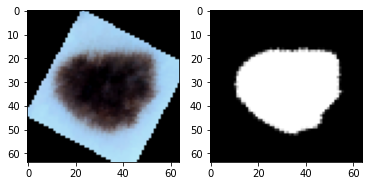

In [1149]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

sample = a[0]
untransform = ToPILImage()

img = untransform(sample['image'])
msk = untransform(sample['mask'])

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(msk, 'gray')
plt.show()

## General Images augmentation

In [6]:
print('General images augmentation...')

General images augmentation...
